In [184]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import time

### Class for Sine Test

In [185]:
class SineTest:

    def __init__(self, fcr_type: str, use_recommended: bool = True):

        """
            Params:
            - fcr_type (str): The type of fcr service.
                - 'up': FCR-D up.
                - 'down': FCR-D down.
            - use_recommended_nbr_periods (bool): 
                - Wether or not to use the recommended number of periods, or the listed number of stationary periods.
                - Defaults to true.
        """

        if fcr_type not in ['up', 'down']:
            raise ValueError(f'{fcr_type} is not a valid argument.')
        self.fcr_type = fcr_type
        self.use_recommended = use_recommended

        # Each of these rows correspond to a specific test sequence [1-10], found in the FCR test description.
        data = [
            [1, 10, 5, 20],
            [2, 15, 5, 15],
            [3, 25, 5, 10],
            [4, 40, 5, 7],
            [5, 50, 5, 7],
            [6, 60, 5, 7],
            [7, 70, 5, 7],
            [8, 90, 5, 7],
            [9, 150, 3, 4],
            [10, 300, 2, 3]
        ]

        # Construct dataframe of test sequences
        self.data = pd.DataFrame(data=data, columns=['test_sequence', 'period_length_sec', 'nbr_stationary_periods', 'recommended_nbr_periods'])


    def sine_func(self, t, T):
        """
            Method to output sinusodial frequency values.
        """
        if self.fcr_type == 'down':
            return 50.3 + 0.1 * np.sin(( 2 * np.pi * t ) / T)
        elif self.fcr_type == 'up':
            return 49.7 + 0.1 * np.sin(( 2 * np.pi * t ) / T)


    def generate_sinus_frequencies(self, test_sequence, plot = True):

        """
            Generates frequencies based on the test sequence (one of the rows in the data table).

            Params:
                - test_sequence [1-10]:
                    - The test sequence to generate frequencies for
                - plot (bool):
                    - Wether or not to plot the generated frequencies

            Returns:
                - frequencies (np.ndarray): 
                    -  An array of size [period_length_sec * 10 * nbr_periods]

            Example (test sequence 1):
                - period_length_sec = 10
                - use_recommended = True (we use 20 total periods)
                - We generate 2000 synthetic frequencies, corresponding tp 20 total periods with a length of 10 seconds each.
        """
        
        self.test_sequence = test_sequence
        row: pd.DataFrame = self.data.loc[self.data['test_sequence'] == test_sequence]
        filtered_row = row[['period_length_sec', 'nbr_stationary_periods', 'recommended_nbr_periods']]
        period_length_sec = filtered_row['period_length_sec'].values[0]
        self.T = period_length_sec
        period_length_centi_sec = period_length_sec * 10
        if self.use_recommended:
             nbr_periods = filtered_row['recommended_nbr_periods'].values[0]
        else:
             nbr_periods = filtered_row['nbr_stationary_periods'].values[0]
        self.num_T = nbr_periods
        timesteps = period_length_centi_sec * nbr_periods
        frequencies = [self.sine_func(t, period_length_centi_sec) for t in range(timesteps)]
        frequencies = np.array(frequencies)
        if plot:
            self.plot_frequencies(frequencies)
        return frequencies
    

    def plot_frequencies(self, frequencies):
        """
            Method to plot the previously generated frequencies
        """
        
        plt.style.use('dark_background')
        plt.figure(figsize=(12, 6))
        plt.plot([(i/(10)) for i in range(len(frequencies))], frequencies, color='orange', label="Frequency, Hz")
        plt.xlabel("Duration [seconds]")
        plt.ylabel(f"Frequency Input [Hz]")
        plt.title(f"Sinus Test - Generated Frequencies [Test Sequence {self.test_sequence}, T = {self.T}, num_T = {self.num_T}]")
        plt.legend()
        plt.grid()
        plt.show()

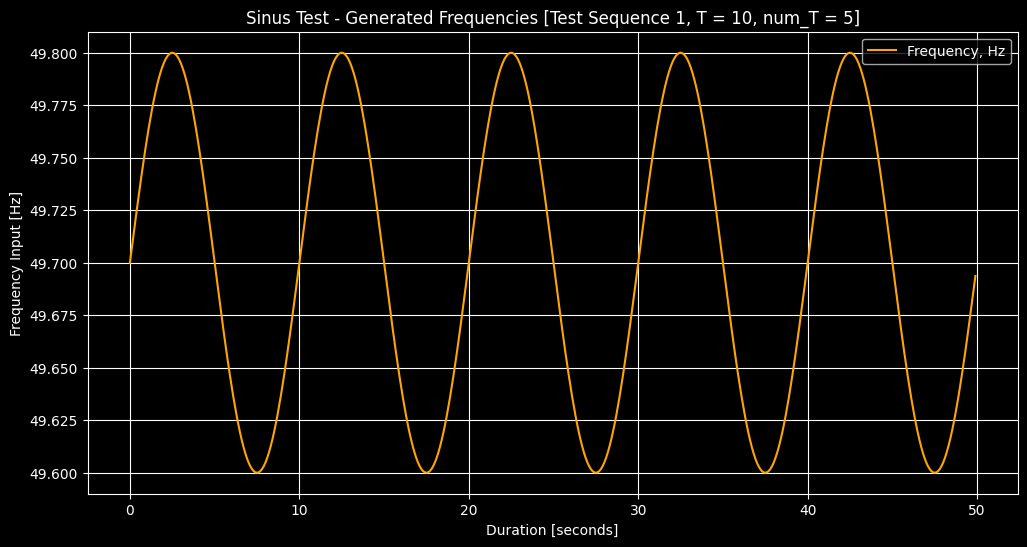

In [186]:
test = SineTest(fcr_type='up', use_recommended=False)
frequencies = test.generate_sinus_frequencies(test_sequence=1, plot=True)

### Mock function to send frequency to batteries

In [187]:
def send_to_battery(frequency):
    # API call logic goes here
    print(f"Inputting frequency: {frequency}")
    return

def transmit_frequencies(frequencies):
    for frequency in frequencies:
        normalizing_factor = 0.975
        time.sleep(0.1 * normalizing_factor)
        send_to_battery(frequency)

def test_battery(frequencies: np.ndarray | list):
    transmit_frequencies(frequencies)

In [188]:
test_battery(frequencies)

Inputting frequency: 49.7
Inputting frequency: 49.70627905195293
Inputting frequency: 49.71253332335643
Inputting frequency: 49.71873813145857
Inputting frequency: 49.72486898871649
Inputting frequency: 49.730901699437496
Inputting frequency: 49.73681245526847
Inputting frequency: 49.74257792915651
Inputting frequency: 49.74817536741018
Inputting frequency: 49.7535826794979
Inputting frequency: 49.75877852522925
Inputting frequency: 49.76374239897487
Inputting frequency: 49.76845471059287
Inputting frequency: 49.772896862742144
Inputting frequency: 49.77705132427758
Inputting frequency: 49.7809016994375
Inputting frequency: 49.784432792550206
Inputting frequency: 49.78763066800439
Inputting frequency: 49.7904827052466
Inputting frequency: 49.79297764858883
Inputting frequency: 49.79510565162952
Inputting frequency: 49.79685831611287
Inputting frequency: 49.798228725072875
Inputting frequency: 49.79921147013145
Inputting frequency: 49.79980267284283
Inputting frequency: 49.8000000000000